<a href="https://colab.research.google.com/github/lt33tx/Landon_Tinch_DTSC3020_Fall2025-/blob/main/RedesignedAssignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Simulations

Welcome to Assignment4!

We will go over [iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html) and [simulations](https://www.inferentialthinking.com/chapters/09/3/Simulation.html), as well as the concept of [randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html).

First, set up the tests and imports by running the cell below.

In [4]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Nachos and Conditionals

In Python, the boolean data type contains only two unique values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. A list of common comparison operators can be found below!

<img src="comparisons.png">

Run the cell below to see an example of a comparison operator in action.

In [9]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [10]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of

---

boolean values.

In [11]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False], dtype=bool)

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed).

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [14]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'cheese'

To repeat this process multiple times, pass in an int `n` as the second argument to return `n` different random choices. By default, `np.random.choice` samples **with replacement** and returns an *array* of items.

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [16]:
np.random.choice(nachos, 10)

array(['salsa', 'neither', 'both', 'cheese', 'salsa', 'salsa', 'both',
       'neither', 'salsa', 'neither'],
      dtype='<U7')

To count the number of times a certain type of nacho is randomly chosen, we can use `np.count_nonzero`

### `np.count_nonzero`

`np.count_nonzero` counts the number of non-zero values that appear in an array. When an array of boolean values are passed through the function, it will count the number of `True` values (remember that in Python, `True` is coded as 1 and `False` is coded as 0.)

Run the next cell to see an example that uses `np.count_nonzero`.

In [17]:
np.count_nonzero(make_array(True, False, False, True, True))

3

In [19]:
# Load the new dataset
dataset_path = 'dickens_great_expectations.txt'
with open(dataset_path, 'r', encoding='utf-8') as f:
   text = f.read()


<span style='background:yellow'>**Question 1.1.**</span>  Create a function to count the number of occurrences of a specific word in the text

In [20]:
def word_count(word):
    lower_word = word.lower()
    words = text.lower().split()

    matches = make_array()
    for w in words:
        matches = np.append(matches, w == lower_word)

    return np.count_nonzero(matches)

In [24]:
count_word = word_count("and")
print(f"The word 'and' appears {count_word} times.")

The word 'and' appears 6740 times.


**Conditional Statements**

A conditional statement is a multi-line statement that allows Python to choose among different alternatives based on the truth value of an expression.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for the first conditional expression that is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed.

For more examples and explanation, refer to the section on conditional statements [here](https://www.inferentialthinking.com/chapters/09/1/conditional-statements.html).

<span style='background:yellow'>**Question 1.2.**</span> Create a function to extract sentences containing a specific keyword.


In [25]:
def extract_sentences_with_keyword(keyword):
    lower_keyword = keyword.lower()

    sentences = text.split('.')

    matching_sentences = make_array()

    for sentence in sentences:
        if lower_keyword in sentence.lower():
            matching_sentences = np.append(matching_sentences, sentence.strip() + '.')

    return matching_sentences

In [82]:
keyword_sentences = extract_sentences_with_keyword('dog')
keyword_sentences

array([ '[Illustration]\n\n“You young dog,” said the man, licking his lips, “what fat cheeks you\nha’ got.',
       '”\n\nI had often watched a large dog of ours eating his food; and I now\nnoticed a decided similarity between the dog’s way of eating, and the\nman’s.',
       'The man took strong sharp sudden bites, just like the dog.',
       'In all of\nwhich particulars he was very like the dog.',
       'No one seemed surprised to see him, or\ninterested in seeing him, or glad to see him, or sorry to see him, or\nspoke a word, except that somebody in the boat growled as if to dogs,\n“Give way, you!” which was the signal for the dip of the oars.',
       'But I felt myself so\nunequal to the performance that I gave it up, and stood looking at Miss\nHavisham in what I suppose she took for a dogged manner, inasmuch as\nshe said, when we had taken a good look at each other,—\n\n“Are you sullen and obstinate?”\n\n“No, ma’am, I am very sorry for you, and very sorry I can’t play just\nnow

<span style='background:yellow'>**Question 1.3.**</span> Write a function to compute the average word length in the text

In [33]:
all_words = text.split()

In [34]:
word_lengths = make_array()
for word in all_words:
    word_lengths = np.append(word_lengths, len(word))

In [35]:
def average_word_length():
    words = text.split()
    lengths = make_array()
    for word in words:
        lengths = np.append(lengths, len(word))

    return np.sum(lengths) / len(lengths)

In [38]:
avg_length = average_word_length()

In [39]:
print(f"The average word length is: {avg_length}")

The average word length is: 4.382256566799373


<span style='background:yellow'>**Question 1.4.**</span> Write a function to simulate a random selection of 100 words from the text.

In [40]:
def simulate_word_selection():
    words = text.split()
    sample_size = 100
    return np.random.choice(words, sample_size)

In [44]:
random_sample = simulate_word_selection()
random_sample[:100]

array(['you', 'at', 'paragraphs', 'what', 'CELL.', 'busy', 'me', 'worn',
       'or', 'it!—there’s', '“O', 'was', 'whiles', 'him,', 'the', 'had',
       'we', 'Now,', 'two', 'they', 'large', 'food,—of', 'I', 'or', 'It',
       'is', 'of', 'of', 'trouble', 'do', 'the', 'flourish', 'last',
       'summoning', 'upon', '“So', 'do', 'was', 'Catechism', 'you',
       'Havisham', 'on', 'pretty', 'me', 'There', 'While', 'officers',
       'in', 'the', 'Mr.', 'roof', 'looked', 'men', 'what', 'by', 'the',
       'he', 'meet', 'that', 'my', 'like—”', 'its', 'the', 'were', 'on',
       'scabbard,', 'whether', 'asleep,', 'little', 'I', 'pie,', 'stopped',
       'that', 'your', 'there,', 'been', 'the', 'see', 'same', 'short',
       'far,', 'encouraged', 'seemed', 'unceremoniously', 'began', 'me',
       'air', 'boy.”', 'from', 'for', 'say', 'that,', 'nothing', 'air',
       'wouldn’t', 'was,', 'events,', 'an', 'could', 'of'],
      dtype='<U32')

<span style='background:yellow'>**Question 1.5.**</span> Write a function to find the most common word in the text

In [45]:
def most_common_word():
    words = text.lower().split()

    word_frequencies = {}

    for word in words:
        if word in word_frequencies:
            word_frequencies[word] += 1
        else:
            word_frequencies[word] = 1

    if not word_frequencies:
        return "Text is empty or contains no words."

    most_common = max(word_frequencies, key=word_frequencies.get)
    return most_common

In [48]:
common_word = most_common_word()


In [49]:
print(f"The most common word in the text is: '{common_word}'")

The most common word in the text is: 'the'


## 2. Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration.

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [50]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. The name `color` is assigned to the next value in `rainbow` at the start of each iteration. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop.

In [51]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative.

<span style='background:yellow'>**Question 2.1.**</span> Write a function to generate a histogram of word lengths

In [52]:
def word_length_histogram():
    words = text.split()

    lengths = make_array()
    for word in words:
        lengths = np.append(lengths, len(word))

    length_table = Table().with_column("Word Length", lengths)

    length_table.hist("Word Length", bins=np.arange(0, 20, 1))
    plt.title("Histogram of Word Lengths")
    plt.xlabel("Word Length (characters)")
    plt.ylabel("Percentage per unit")


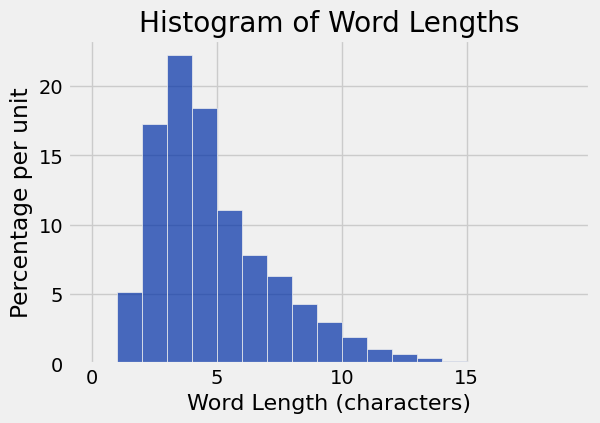

In [53]:
word_length_histogram()

<span style='background:yellow'>**Question 2.2.**</span> Write a function to calculate the proportion of unique words in the text

In [54]:
def proportion_unique_words():
    words = text.lower().split()

    total_words = len(words)

    unique_words = set(words)

    count_unique = len(unique_words)

    if total_words == 0:
        return 0
    else:
        return count_unique / total_words

In [56]:
unique_prop = proportion_unique_words()
print(f"The proportion of unique words is: {unique_prop}")

The proportion of unique words is: 0.1131538781739975


We can also use `np.random.choice` to simulate multiple trials.

<span style='background:yellow'>**Question 2.3.**</span> Write a function to simulate drawing random words and estimate the proportion of unique words

In [63]:
def estimate_unique_proportion(sample_size=10000):
    all_words = text.lower().split()

    random_sample = np.random.choice(all_words, sample_size)

    total_words_in_sample = len(random_sample)

    unique_words_in_sample = set(random_sample)
    count_unique = len(unique_words_in_sample)

    if total_words_in_sample == 0:
        return 0
    else:
        return count_unique / total_words_in_sample

In [64]:
estimated_prop = estimate_unique_proportion(sample_size=10000)
print(f"The estimated proportion of unique words in a sample is: {estimated_prop}")

The estimated proportion of unique words in a sample is: 0.3006


## 3. Probability


<span style='background:yellow'>**Question 3.1.**</span> Write a function to find the longest sentence in the text

In [67]:
def find_longest_sentence():
    standardized_text = text.replace('?', '.').replace('!', '.')

    sentences = standardized_text.split('.')

    longest_sentence = ""
    max_word_count = -1

    for sentence in sentences:
        cleaned_sentence = sentence.strip()

        words_in_sentence = cleaned_sentence.split()
        current_word_count = len(words_in_sentence)

        if current_word_count > max_word_count:
            max_word_count = current_word_count
            longest_sentence = cleaned_sentence + '.'

    return longest_sentence

In [69]:
longest_s = find_longest_sentence()

print(f"The longest sentence (by word count) is: {longest_s}")

The longest sentence (by word count) is: ”

Again among the tiers of shipping, in and out, avoiding rusty
chain-cables frayed hempen hawsers and bobbing buoys, sinking for the
moment floating broken baskets, scattering floating chips of wood and
shaving, cleaving floating scum of coal, in and out, under the
figure-head of the _John of Sunderland_ making a speech to the winds
(as is done by many Johns), and the _Betsy of Yarmouth_ with a firm
formality of bosom and her knobby eyes starting two inches out of her
head; in and out, hammers going in ship-builders’ yards, saws going at
timber, clashing engines going at things unknown, pumps going in leaky
ships, capstans going, ships going out to sea, and unintelligible
sea-creatures roaring curses over the bulwarks at respondent
lightermen, in and out,—out at last upon the clearer river, where the
ships’ boys might take their fenders in, no longer fishing in troubled
waters with them over the side, and where the festooned sails might fly
ou

<span style='background:yellow'>**Question 3.2.**</span> Write a function to compute a moving average of sentence lengths

In [70]:
def compute_moving_average(window_size=10):
    standardized_text = text.replace('?', '.').replace('!', '.')
    sentences = standardized_text.split('.')

    sentence_lengths = make_array()
    for sentence in sentences:
        words = sentence.strip().split()
        if len(words) > 0:
            sentence_lengths = np.append(sentence_lengths, len(words))

    moving_averages = make_array()

    for i in range(window_size - 1, len(sentence_lengths)):
        current_window = sentence_lengths[i - window_size + 1 : i + 1]

        window_average = np.mean(current_window)

        moving_averages = np.append(moving_averages, window_average)

    return moving_averages

In [72]:
moving_avg_lengths = compute_moving_average(window_size=10)

print(f"Computed {len(moving_avg_lengths)} moving averages.")

Computed 11044 moving averages.


<span style='background:yellow'>**Question 3.3.**</span> Write a function to simulate randomly selecting sentences and compute their average length




In [78]:
standardized_text_all = text.replace('?', '.').replace('!', '.')
sentences_all = standardized_text_all.split('.')

all_sentence_lengths = make_array()
for sentence in sentences_all:
    words = sentence.strip().split()
    if len(words) > 0:
        all_sentence_lengths = np.append(all_sentence_lengths, len(words))


In [79]:
def simulate_average_sentence_length(sample_size=500):

    random_lengths = np.random.choice(all_sentence_lengths, sample_size)

    return np.mean(random_lengths)

trial1 = simulate_average_sentence_length(sample_size=500)
trial2 = simulate_average_sentence_length(sample_size=500)
trial3 = simulate_average_sentence_length(sample_size=500)

print(f"Trial 1 Estimated Average Length: {trial1:.2f} words")
print(f"Trial 2 Estimated Average Length: {trial2:.2f} words")
print(f"Trial 3 Estimated Average Length: {trial3:.2f} words")

Trial 1 Estimated Average Length: 16.68 words
Trial 2 Estimated Average Length: 16.98 words
Trial 3 Estimated Average Length: 17.27 words


<span style='background:yellow'>**Question 3.4.**</span> Write a function to estimate probability of a sentence exceeding a given length

In [76]:
def estimate_long_sentence_probability(length_threshold, sample_size=10000):
    standardized_text = text.replace('?', '.').replace('!', '.')
    sentences = standardized_text.split('.')

    all_sentence_lengths = make_array()
    for sentence in sentences:
        words = sentence.strip().split()
        if len(words) > 0:
            all_sentence_lengths = np.append(all_sentence_lengths, len(words))

    random_lengths = np.random.choice(all_sentence_lengths, sample_size)

    is_long_sentence = random_lengths > length_threshold

    number_of_successes = np.count_nonzero(is_long_sentence)

    return number_of_successes / sample_size

In [77]:
threshold = 30

prob_estimate = estimate_long_sentence_probability(threshold, sample_size=10000)

print(f"The estimated probability of a random sentence exceeding {threshold} words is: {prob_estimate:.4f}")

The estimated probability of a random sentence exceeding 30 words is: 0.1739


Great job! You're finished with Assignment 4! Be sure to...

* **run all the tests**,
* **print the notebook as a PDF**,
* and **submit both the notebook and the PDF to Canvas**.